In [1]:
# Import the relevant libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from brewer2mpl import qualitative

In [2]:
video = pd.read_csv('../DataSets/video_game_sales/Video_Games_Sales_as_at_22_Dec_2016.csv')
video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(video.shape)

(16719, 16)


In [4]:
video.isnull().any().any()

True

In [5]:
video = video.dropna(axis=0)

In [6]:
from tabulate import tabulate
tabulate(video.info(), headers='keys', tablefmt='psql')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


''

In [7]:
platform_unique = video.Platform.unique()

<AxesSubplot:title={'center':'Pearson Correlation of Video Game Numerical Features'}>

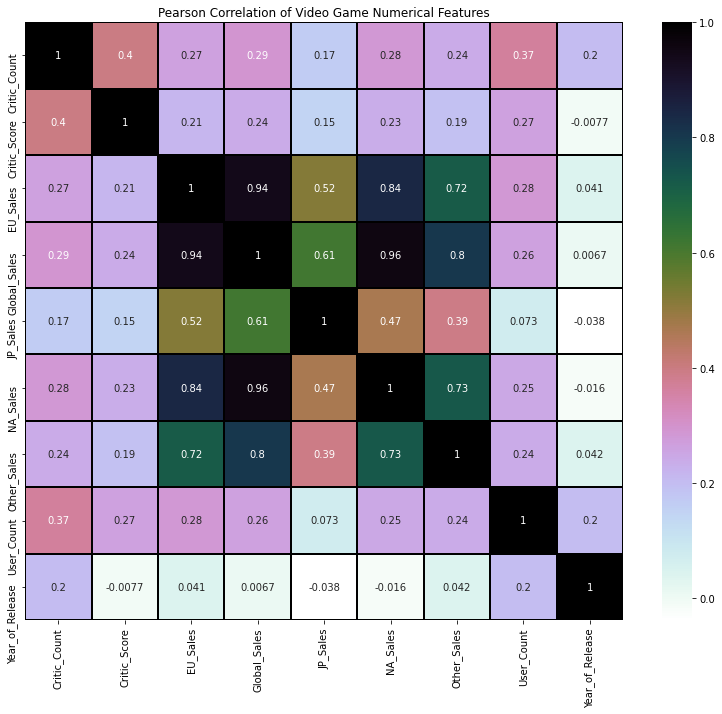

In [8]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in video.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)

# Get to the numeric columns by inversion            
num_list = video.columns.difference(str_list) 

# Create Dataframe containing only numerical features
video_num = video[num_list]

f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(video_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [9]:
video['User_Score'] = pd.to_numeric(video['User_Score'])

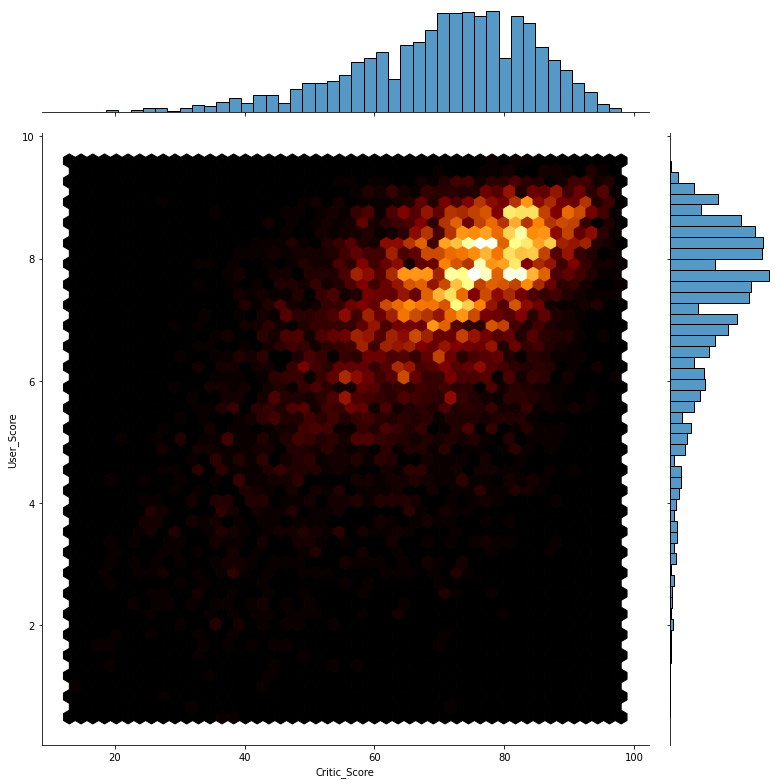

In [10]:
sns.jointplot(x='Critic_Score',y='User_Score',data=video,
              kind='hex', cmap= 'afmhot', height=11)

c:\users\zhha8003\jupyter-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


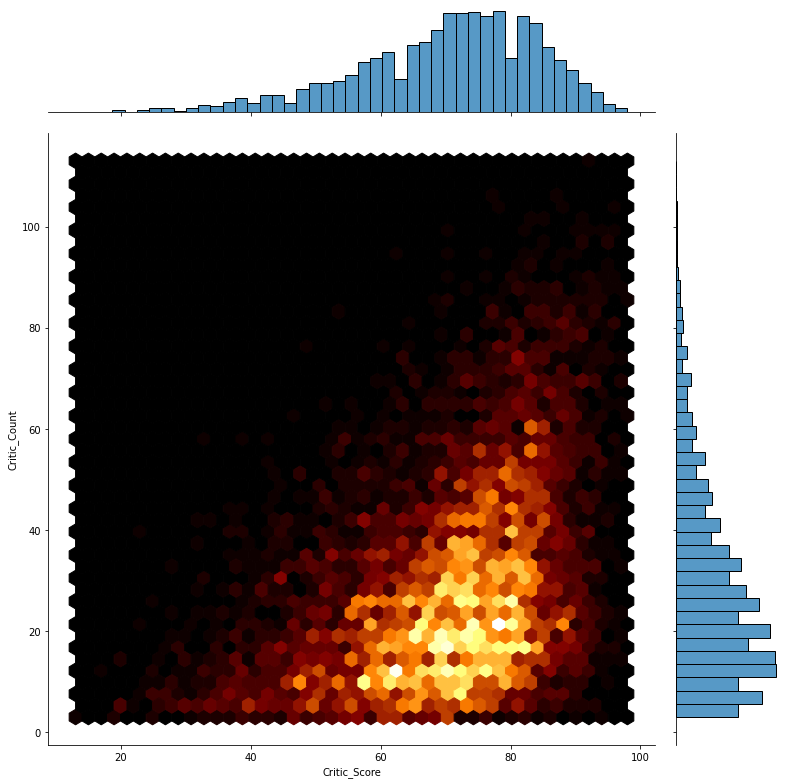

In [11]:
sns.jointplot('Critic_Score','Critic_Count',data=video,
              kind='hex', cmap='afmhot', height=11)

In [12]:
# Dataframe contain info only on the 7th Gen consoles
video7th = video[(video['Platform'] == 'Wii') | (video['Platform'] == 'PS3') | (video['Platform'] == 'X360')]
video7th.shape

(2106, 16)

Text(0, 0.5, 'Global Sales')

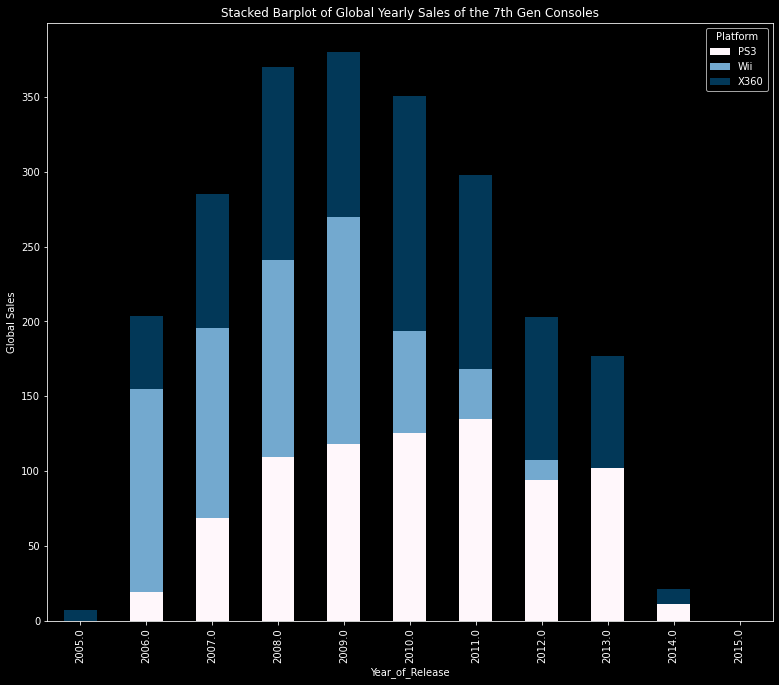

In [13]:
plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

Text(0, 0.5, 'Sales')

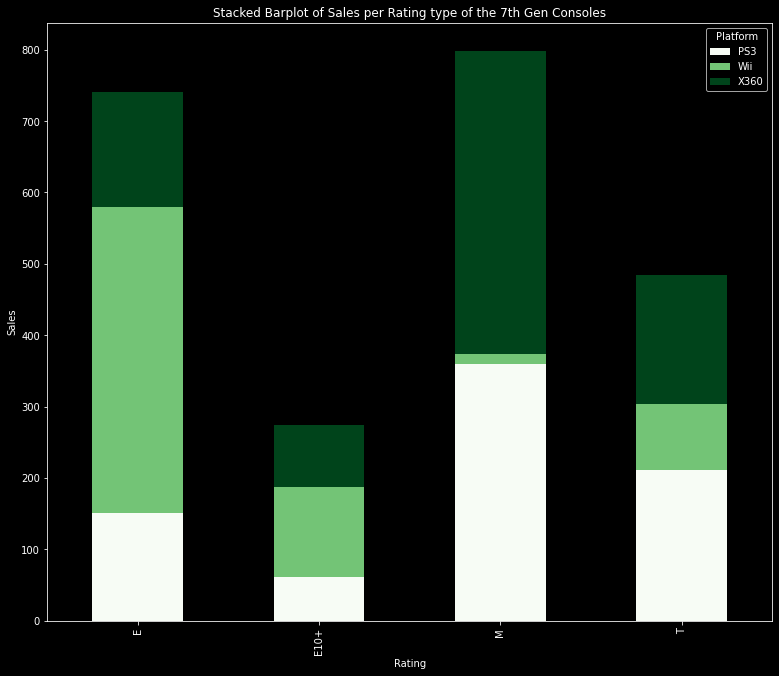

In [14]:
plt.style.use('dark_background')
ratingSales = video7th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', 
                           grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

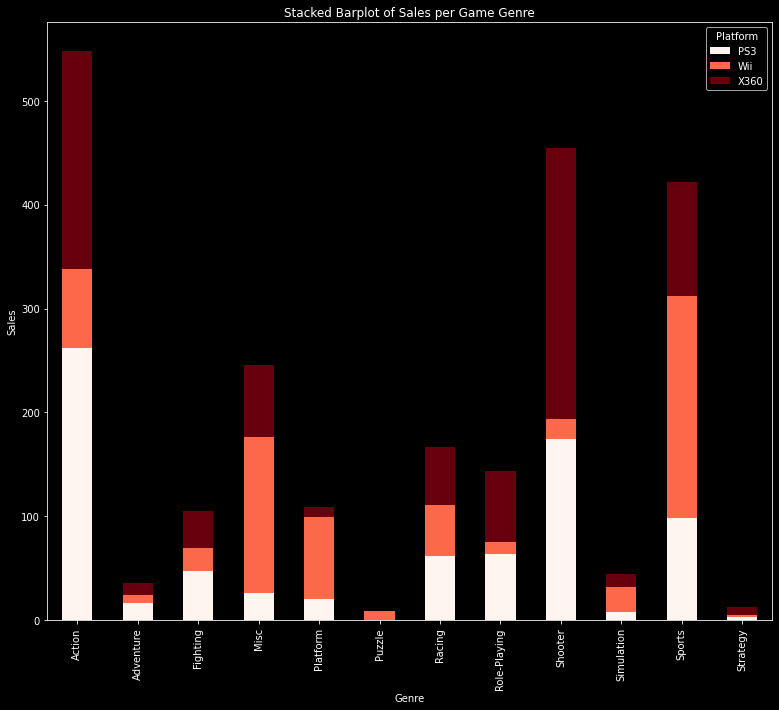

In [15]:
plt.style.use('dark_background')
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Reds', 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

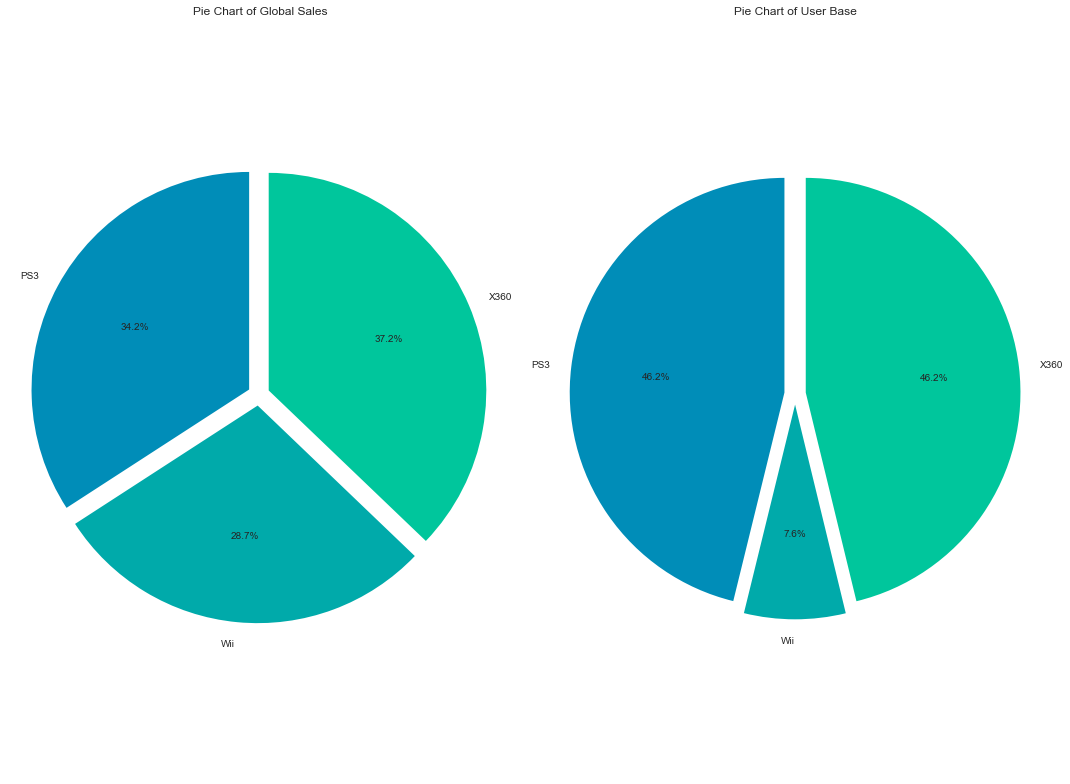

In [16]:
# Plotting our pie charts
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(121)
plt.pie(
   video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')
plt.subplot(122)
plt.pie(
   video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()